In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./training_v2.csv')

In [3]:
df.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [4]:
null_counts = df.isna().sum()
full_counts = df.count()
ratio = null_counts/full_counts
concern_columns = np.where(ratio>=0.5)
df_concern = df[df.columns[concern_columns]]
df_concern.head()

,albumin_apache,bilirubin_apache,fio2_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,urineoutput_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,...,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min
0,2.3,0.4,NaN,NaN,NaN,NaN,NaN,NaN,46.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,37.0,37.0,51.0,7.45,NaN,NaN,NaN,...,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.6,30.0,30.0,142.0,7.39,NaN,62.0,30.0,...,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


74


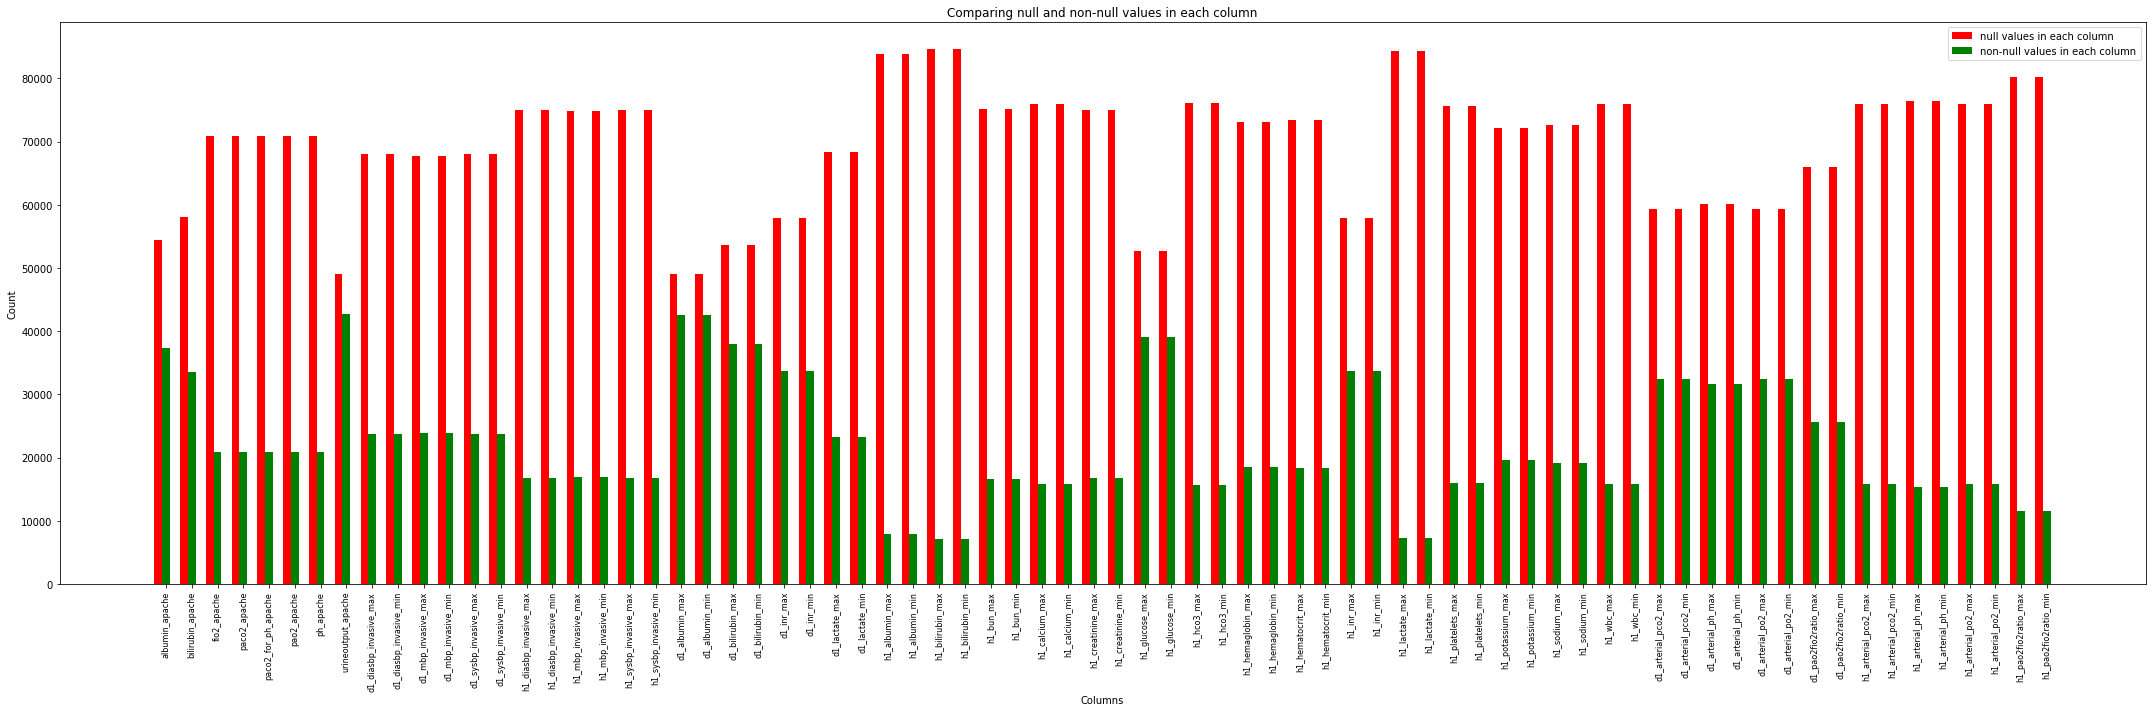

In [5]:
print(len(df_concern.columns))
bar_width = 0.3
fig, ax = plt.subplots(figsize=(30,10))
index = np.arange(len(df_concern.columns))
null_counts = df_concern.isna().sum()
null_bars = plt.bar(index, null_counts, bar_width, color='r', label='null values in each column')
full_counts = df_concern.count()
full_bars = plt.bar(index + bar_width, full_counts, bar_width, color='g', label='non-null values in each column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Comparing null and non-null values in each column')
plt.xticks(index + bar_width, df_concern.columns, rotation = 90, size = 8)
plt.legend()

plt.tight_layout()
plt.show()

<b>The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below -0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.</b>

In [6]:
corr_matrix = df.corr(method ='pearson')
print(corr_matrix)

                             encounter_id  patient_id  hospital_id  \
encounter_id                     1.000000   -0.009575    -0.004532   
patient_id                      -0.009575    1.000000    -0.007075   
hospital_id                     -0.004532   -0.007075     1.000000   
hospital_death                  -0.005243    0.004877    -0.001255   
age                             -0.003990    0.006343    -0.008673   
...                                   ...         ...          ...   
hepatic_failure                 -0.000972   -0.001667     0.001362   
immunosuppression               -0.001707    0.000548     0.000146   
leukemia                        -0.002172    0.000844    -0.002992   
lymphoma                        -0.001176    0.002333     0.002588   
solid_tumor_with_metastasis     -0.004646   -0.003065    -0.004730   

                             hospital_death       age       bmi  \
encounter_id                      -0.005243 -0.003990 -0.001068   
patient_id               

In [7]:
c = corr_matrix.unstack()
c = c[(c>=0.9) & (c<1)].sort_values(ascending=False)
print(c.to_string())

h1_bilirubin_min           h1_bilirubin_max             0.999934
h1_bilirubin_max           h1_bilirubin_min             0.999934
h1_albumin_max             h1_albumin_min               0.999727
h1_albumin_min             h1_albumin_max               0.999727
h1_bun_max                 h1_bun_min                   0.999630
h1_bun_min                 h1_bun_max                   0.999630
h1_creatinine_max          h1_creatinine_min            0.999405
h1_creatinine_min          h1_creatinine_max            0.999405
h1_platelets_max           h1_platelets_min             0.998206
h1_platelets_min           h1_platelets_max             0.998206
d1_diasbp_max              d1_diasbp_noninvasive_max    0.997831
d1_diasbp_noninvasive_max  d1_diasbp_max                0.997831
h1_wbc_min                 h1_wbc_max                   0.997524
h1_wbc_max                 h1_wbc_min                   0.997524
d1_diasbp_min              d1_diasbp_noninvasive_min    0.996871
d1_diasbp_noninvasive_min

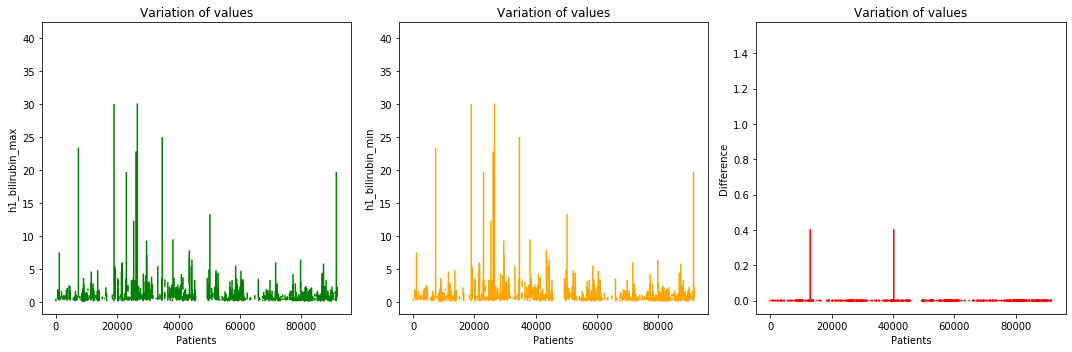

In [8]:
diff_hbilirubin_min_max = df['h1_bilirubin_max']-df['h1_bilirubin_min']
patients = np.arange(len(df))
f, axs = plt.subplots(2,2,figsize=(15,5))
h_b_max = df['h1_bilirubin_max']
plt.subplot(1, 3, 1)
plt.plot(patients, h_b_max, color='g')
plt.xlabel('Patients')
plt.ylabel('h1_bilirubin_max')
plt.title('Variation of values')
h_b_min = df['h1_bilirubin_min']
plt.subplot(1, 3, 2)
plt.plot(patients, h_b_min, color='orange')
plt.xlabel('Patients')
plt.ylabel('h1_bilirubin_min')
plt.title('Variation of values')
plt.subplot(1, 3, 3)
plt.plot(patients, diff_hbilirubin_min_max, color='red')
plt.xlabel('Patients')
plt.ylabel('Difference')
plt.title('Variation of values')
plt.tight_layout()
plt.show()

<h5>For most of the values, h1_bilirubin_min = h1_bilirubin_max, so one of these can be safely dropped </h5>

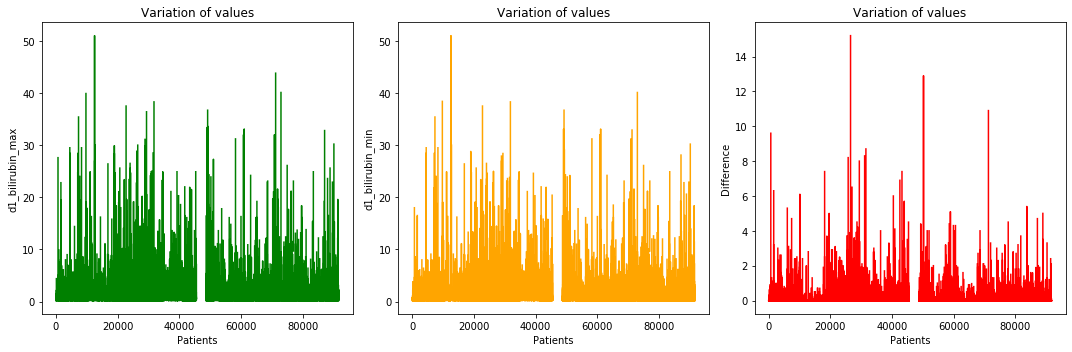

In [9]:
diff_dbilirubin_min_max = df['d1_bilirubin_max']-df['d1_bilirubin_min']
patients = np.arange(len(df))
f, axs = plt.subplots(2,2,figsize=(15,5))
d_b_max = df['d1_bilirubin_max']
plt.subplot(1, 3, 1)
plt.plot(patients, d_b_max, color='g')
plt.xlabel('Patients')
plt.ylabel('d1_bilirubin_max')
plt.title('Variation of values')
d_b_min = df['d1_bilirubin_min']
plt.subplot(1, 3, 2)
plt.plot(patients, d_b_min, color='orange')
plt.xlabel('Patients')
plt.ylabel('d1_bilirubin_min')
plt.title('Variation of values')
plt.subplot(1, 3, 3)
plt.plot(patients, diff_dbilirubin_min_max, color='red')
plt.xlabel('Patients')
plt.ylabel('Difference')
plt.title('Variation of values')
plt.tight_layout()
plt.show()

<h5>Correlation is very high between day and hour readings of bilirubin, but there's a noticeable difference in their values</h5>

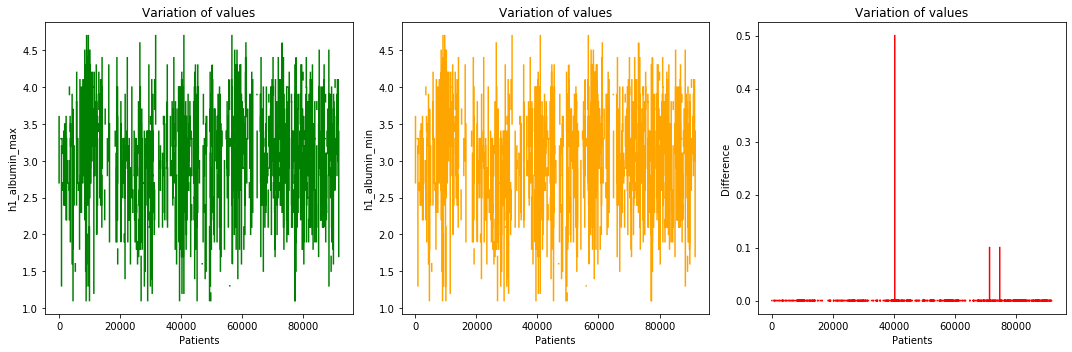

In [10]:
diff_halbumin_min_max = df['h1_albumin_max']-df['h1_albumin_min']
f, axs = plt.subplots(2,2,figsize=(15,5))
h_a_max = df['h1_albumin_max']
plt.subplot(1, 3, 1)
plt.plot(patients, h_a_max, color='g')
plt.xlabel('Patients')
plt.ylabel('h1_albumin_max')
plt.title('Variation of values')
h_a_min = df['h1_albumin_min']
plt.subplot(1, 3, 2)
plt.plot(patients, h_a_min, color='orange')
plt.xlabel('Patients')
plt.ylabel('h1_albumin_min')
plt.title('Variation of values')
plt.subplot(1, 3, 3)
plt.plot(patients, diff_halbumin_min_max, color='red')
plt.xlabel('Patients')
plt.ylabel('Difference')
plt.title('Variation of values')
plt.tight_layout()
plt.show()

In [11]:
high_corr_columns = ['h1_bilirubin_max', 'h1_albumin_max',
                     'h1_bun_max','h1_creatinine_max','h1_platelets_max',
                     'h1_wbc_max', 'd1_diasbp_noninvasive_min','h1_mbp_noninvasive_min',
                     'd1_bilirubin_max','d1_sysbp_noninvasive_max','h1_sysbp_noninvasive_max',
                     'd1_sysbp_noninvasive_min','d1_mbp_noninvasive_min','d1_creatinine_max',
                     'h1_hco3_min']
df = df.drop(columns=high_corr_columns)

<b>binary_columns = 
hospital_death,
elective_surgery,
readmission_status,
apache_post_operative,
arf_apache,
gcs_unable_apache,
intubated_apache,
ventilated_apache,
aids,
cirrhosis,
diabetes_mellitus,
hepatic_failure,
immunosuppression,
leukemia,
lymphoma,
solid_tumor_with_metastasis</b>

In [12]:
total = len(df.index)
for col1 in df.columns:
    for col2 in df.columns:
        equal = (df[col1]==df[col2])
        count_equals = equal.sum()
        perc_equals = (count_equals/total)*100
        if (perc_equals>=98 and col1!=col2):
            print((col1,col2,perc_equals))

('readmission_status', 'aids', 99.13534613413584)
('readmission_status', 'leukemia', 98.51929388418218)
('readmission_status', 'lymphoma', 98.81041946070896)
('d1_diasbp_max', 'd1_diasbp_noninvasive_max', 98.50839030453697)
('d1_diasbp_noninvasive_max', 'd1_diasbp_max', 98.50839030453697)
('aids', 'readmission_status', 99.13534613413584)
('aids', 'leukemia', 98.43424596294965)
('aids', 'lymphoma', 98.73409440319256)
('leukemia', 'readmission_status', 98.51929388418218)
('leukemia', 'aids', 98.43424596294965)
('leukemia', 'lymphoma', 98.14857217624547)
('lymphoma', 'readmission_status', 98.81041946070896)
('lymphoma', 'aids', 98.73409440319256)
('lymphoma', 'leukemia', 98.14857217624547)


In [13]:
print(df['readmission_status'].unique())

[0]


In [14]:
binary_columns = ['hospital_death', 'elective_surgery', 'readmission_status', 'apache_post_operative', 'arf_apache', 
                  'gcs_unable_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 
                  'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']

In [15]:
for col in binary_columns:
    print((col,df[col].unique()))
    
# since these columns indicate key conditions, there cannot be a missing 1, if the patient has the condition
# imputing with 0s
df[binary_columns] = df[binary_columns].fillna(0)

('hospital_death', array([0, 1]))
('elective_surgery', array([0, 1]))
('readmission_status', array([0]))
('apache_post_operative', array([0, 1]))
('arf_apache', array([ 0.,  1., nan]))
('gcs_unable_apache', array([ 0., nan,  1.]))
('intubated_apache', array([ 0.,  1., nan]))
('ventilated_apache', array([ 0.,  1., nan]))
('aids', array([ 0., nan,  1.]))
('cirrhosis', array([ 0.,  1., nan]))
('diabetes_mellitus', array([ 1.,  0., nan]))
('hepatic_failure', array([ 0.,  1., nan]))
('immunosuppression', array([ 0.,  1., nan]))
('leukemia', array([ 0.,  1., nan]))
('lymphoma', array([ 0., nan,  1.]))
('solid_tumor_with_metastasis', array([ 0.,  1., nan]))


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 171 entries, encounter_id to apache_2_bodysystem
dtypes: float64(155), int64(8), object(8)
memory usage: 119.7+ MB


In [17]:
count = df['gender'].value_counts()
# Since the number of male and female is roughly the same, NAs can be filled by a third category 'other'
df['gender'] = df['gender'].fillna('O')
count = df['gender'].value_counts()
print(count)

M    49469
F    42219
O       25
Name: gender, dtype: int64


In [18]:
print(df['hospital_admit_source'].unique())

['Floor' 'Emergency Department' 'Operating Room' nan 'Direct Admit'
 'Other Hospital' 'Other ICU' 'ICU to SDU' 'Recovery Room'
 'Chest Pain Center' 'Step-Down Unit (SDU)' 'Acute Care/Floor' 'PACU'
 'Observation' 'ICU' 'Other']


In [21]:
print(len(df['encounter_id'].unique()))

91713


In [20]:
print(len(df['hospital_id'].unique()))

147
